# **Ocean and Land Temperature Anomalies**

### Description
The project aims to analyze global temperature change over time through data visualization techniques. It involves gathering temperature anomalies data from diverse sources, processing, and cleaning it before employing various visualization methods. The objective is to provide insights into climate change trends and patterns, fostering understanding and urgency for sustainable practices and environmental supervision.

---
### **Team Members**

*   Saffian Asghar
*   Alexis Culpin
*   Romaric Sallustre
*   Emilio Espinosa S.

---

## Setup

In [363]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from pathlib import Path
import json
import warnings 
warnings.filterwarnings('ignore')

### Constants and Functions

In [364]:
NOAA_URL = "https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/12/1850-2023/data.json"
BERKLEY_URL = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Raw_TMAX_complete.txt"
HAD_CRUT5_URL = "https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv"

#### Function to get data if it doesn't exist

In [365]:
def save_data(urls, folder):
    """
    Downloads data from the given URLs and saves it in the specified folder.

    Args:
        urls (dict): A dictionary containing the names and URLs of the data files to be downloaded.
        folder (str): The name of the folder where the data files will be saved.

    Returns:
        None
    """
    subfolder = Path(f"./data/{folder}")
    subfolder.mkdir(parents=True, exist_ok=True)
    
    for key, url in urls.items():
        website_url = url.split("/")[2]
        file_extension = url.split(".")[-1]
        filepath = subfolder / f"{key}.{file_extension}"
        
        if not filepath.exists():
            urllib.request.urlretrieve(url, filepath)
            print(f"Data saved for {website_url} at {filepath}")
        else:
            print(f"Data already exists for {website_url} at {filepath}")

### Fetching global temperature data

In [366]:
urls = {"noaa_df" : NOAA_URL, "berkley_df" : BERKLEY_URL, "had_crut5_df" : HAD_CRUT5_URL}
save_data(urls, "global_temperature")

Data already exists for www.ncei.noaa.gov at data\global_temperature\noaa_df.json
Data already exists for berkeley-earth-temperature.s3.us-west-1.amazonaws.com at data\global_temperature\berkley_df.txt
Data already exists for www.metoffice.gov.uk at data\global_temperature\had_crut5_df.csv


## Data Cleaning & Transformation


#### **NOAA dataset**

The dataset is hosted by NOAA's National Centers for Environmental Information (NCEI). It contains temperature anomaly data, representing deviations from a reference temperature over time. 

**Technical information**

* Data is collected from 1850 - 2023.
* The data is in JSON format.
* Columns of interest: year and data (yearly anomaly).

| Field        | Description                                                                                                     |
|--------------|-----------------------------------------------------------------------------------------------------------------|
| `DATE`  | Period of time in years.                                                                          |
| `DESCRIPTION`  | Description of data set itself.                                                                                       |
| `DATA`        | Anomaly in degrees Celsius.                                       |

**Data transformation required**
1. Read JSON.
2. Drop the description column.
3. Ensure every value within the date and data columns is numeric. The non-numeric values have to be drop.
4. Make sure the index (date) is an integer type value.
5. Rename data column to NOAAGlobalTemp and add the minimum and maximum years.

**Link**

* https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/12/1850-2023/data.json

**License**

Creative Commons Attribution 4.0 International license (CC-BY-4.0)


In [367]:
# Read Json file
df_noaa = pd.read_json("./data/global_temperature/noaa_df.json")

# Dataframe drop unnecessary columns and rows that are not numeric and set index as int
df_noaa = (
    df_noaa
    .drop('description', axis=1)
    .loc[pd.to_numeric(df_noaa.index, errors='coerce').notna()]
)
df_noaa.index = df_noaa.index.astype(int)
# Rename columns with specific format for better visualization
df_noaa = df_noaa.rename(columns=lambda x: f"NOAAGlobalTemp ({df_noaa.index.min()} - {df_noaa.index.max()})")
df_noaa.head()

,NOAAGlobalTemp (1850 - 2023)
1850,-0.06
1851,-0.08
1852,-0.01
1853,-0.12
1854,0.02


#### **CRUT5 dataset**

The dataset is derived from the Hadley Centre for Climate Science and Services at the UK Met Office, suggesting tabular data, possibly containing global monthly climate information. The dataset includes time series summaries for global climate analysis, incorporating columns with both upper and lower confidence limits.

**Technical information**

* Data collected from 1850 - 2023.
* The data is in CSV format.
* Columns of interest: year and anomaly in degrees celsius (temperature anomaly).

| Field        | Description                                                                                                     |
|--------------|-----------------------------------------------------------------------------------------------------------------|
| `YEAR_MONTH`  | Period of time in "YYYY-MM" format.                                                                      |
| `ANOMALY IN DEGREES CELSIUS`  | Monthly anomaly in degrees celsius.                                                                                   |
| `LOWER CONFIDENCE LIMIT (2.5%)`        | Numbers at the lower end of the confidence interval.                |
| `UPPER CONFIDENCE LIMIT (97.5%)`        | Numbers at the upper end of the confidence interval.                     |

**Data transformation required**
 1. Read a CSV file into a pandas DataFrame, parsing the 'Time' column as dates.
 2. Group the DataFrame by the year part of the 'Time' column.
 3. Calculate the mean of the 'Anomaly (deg C)' column for each year.
 4. Reset the DataFrame index.
 5. Set the 'Time' column as the new index.
 6. Convert the index values to integers.
 

**Link**

* https://www.metoffice.gov.uk/hadobs/hadcrut5/data/HadCRUT.5.0.2.0/analysis/diagnostics/HadCRUT.5.0.2.0.analysis.summary_series.global.monthly.csv

**License**

Open Government License (OGL) for Public Sector Information.

In [368]:
# read second dataset
had_crut5_df = pd.read_csv('./data/global_temperature/had_crut5_df.csv', parse_dates=['Time'])
# Group by year and calculate average per year.
had_crut5_df = (
    had_crut5_df
    .groupby(had_crut5_df['Time'].dt.year)['Anomaly (deg C)'].mean().reset_index()
    .set_index('Time')
)
# Set index as int
had_crut5_df.index = had_crut5_df.index.astype(int)
had_crut5_df.head()

,Anomaly (deg C)
Time,
1850,-0.417711
1851,-0.233350
1852,-0.229399
1853,-0.270354
1854,-0.291521


#### **Berkley dataset**

The dataset is associated with the Berkeley Earth project, an independent climate science organization, the dataset focuses on the "Annual Anomaly" column. Housed on Amazon S3, the data contains raw maximum temperature (TMAX) data, reflecting the highest recorded temperatures.

**Technical information**

* Data collected from 1850 - 2023.
* The dataset has missing values in 2023.
* The data is in TXT format.
* Columns of interest: year and annual anomaly (difference of temperature from a base reference).

| Field        | Description                                                                                                     |
|--------------|-----------------------------------------------------------------------------------------------------------------|
| `YEAR`  | Period of time in years.                                                 |
| `MONTH`  | Period of time in months.                                                                          |
| `MONTHLY ANOMALY`        | Monthly anomaly in degrees celsius.                                     |
| `ANNUAL ANOMALY`        | Yearly anomaly in degrees celsius.               |
| `FIVE YEAR ANOMALY`        | 5 year rolling average anomaly in degrees celsius.               |
| `TEN YEAR ANOMALY`        | 10 year rolling average anomaly in degrees celsius.               |
| `TWENTY YEAR ANOMALY`        | 20 year rolling average anomaly in degrees celsius.           |

**Data transformation required**
 1. Read a space-delimited text file into a pandas DataFrame, ignoring lines that start with "%".
 2. Group the DataFrame by the 'year' column.
 3. Calculate the mean of the 'anomaly' column for each year.
 4. Reset the DataFrame index.
 5. Set the 'year' column as the new index.
 6. Convert the index values to integers.
 
**Link**

* https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Raw_TMAX_complete.txt

**License**

Creative Commons Attribution 4.0 International license (CC-BY-4.0)


In [369]:
# Read third dataset
berkley_df = pd.read_csv('./data/global_temperature/berkley_df.txt', comment="%", delim_whitespace=True, names= ["year", "month", "anomaly", "yearAvgAnomaly", "5yearAvgAnomaly", "10yearAvgAnomaly", "20yearAvgAnomaly"])
# Group by year and calculate average per year.
berkley_df = (
    berkley_df
    .groupby(berkley_df['year'])['anomaly'].mean().reset_index()
    .set_index('year')
)
berkley_df.index = berkley_df.index.astype(int)
berkley_df

,anomaly
year,
1850,-1.141667
1851,-0.971583
1852,-1.007917
1853,-0.382333
1854,-0.170500
...,...
2019,1.199167
2020,1.391000
2021,1.160500


In [370]:
# Joining the dataframes and renaming the columns for the final merge below
merged_df = (
    df_noaa
    .join(had_crut5_df.rename(columns={'Anomaly (deg C)': 'HadCRUT5_Anomaly'}), how='left')
    .join(berkley_df.rename(columns={'anomaly':'Berkley_anomaly'}), how='left')
)

# Final merge with all three datasets
merged_df = (
    merged_df
    .rename(columns={'HadCRUT5_Anomaly': f"HAD_CRUT5 ({had_crut5_df.index.min()} - {had_crut5_df.index.max()})"})
    .rename(columns={'Berkley_anomaly': f"BerkleyEarth ({berkley_df.index.min()} - {berkley_df.index.max()})"})
)

## Limited Perspective: An wishful look at Temperature Anomalies
The plot displays temperature anomalies over time from three datasets: NOAAGlobalTemp, HAD_CRUT5, and BerkleyEarth. However, due to the limited y-axis range of -30 to 30 degrees Celsius, it's difficult to discern significant increases or extreme anomalies. This narrow range constrains our perspective, potentially obscuring important trends in the data and leading to a lack of deeper understanding.

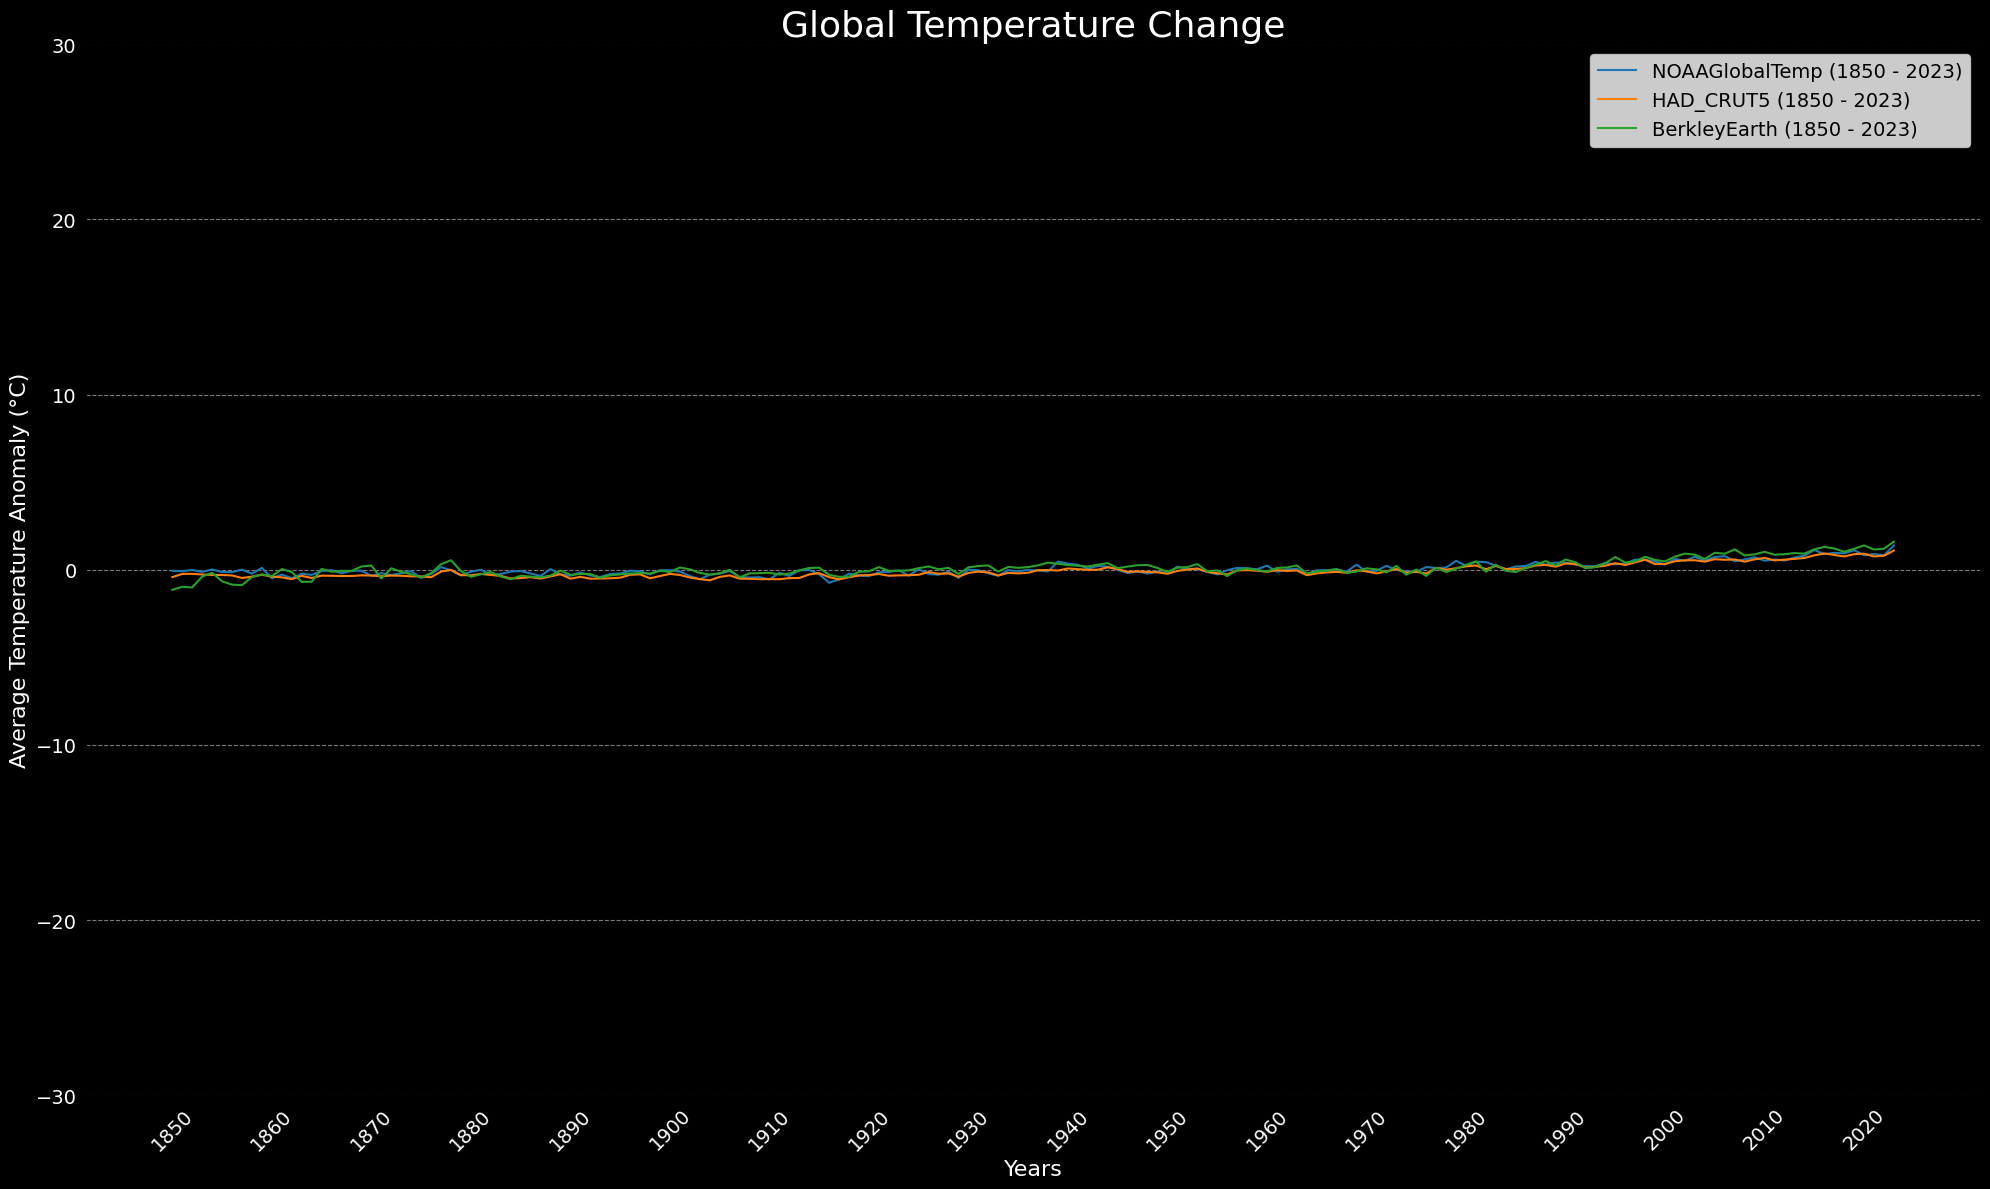

In [371]:
# Plot individual datasets
plt.figure(figsize=(20, 12), facecolor='black')
bars = plt.plot(merged_df.index, merged_df)

plt.title('Global Temperature Change', fontsize=26, color='white')
plt.xlabel('Years', fontsize=16, color='white')
plt.ylabel('Average Temperature Anomaly (°C)', fontsize=16, color='white')
plt.xticks(range(merged_df.index.min(), merged_df.index.max(), 10), rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('black')

plt.legend(merged_df.columns, fontsize=14)
plt.ylim(-30, 30)
plt.tight_layout()
plt.show()

## Zooming in: Untangling Temperature Anomalies
In this revised plot, the y-axis limit has been removed, allowing for a broader perspective on temperature anomalies. With the expanded range, the plot provides a clearer view of the fluctuations and trends in temperature anomalies over time. However, it's worth noting that even with this adjustment, the plot may still not reveal an alarming rise in temperature anomalies. While the broader perspective allows for a more comprehensive analysis of the data, it's essential to consider that significant increases in temperature may require additional context or specific data visualization techniques to be properly highlighted, as we will see later on.

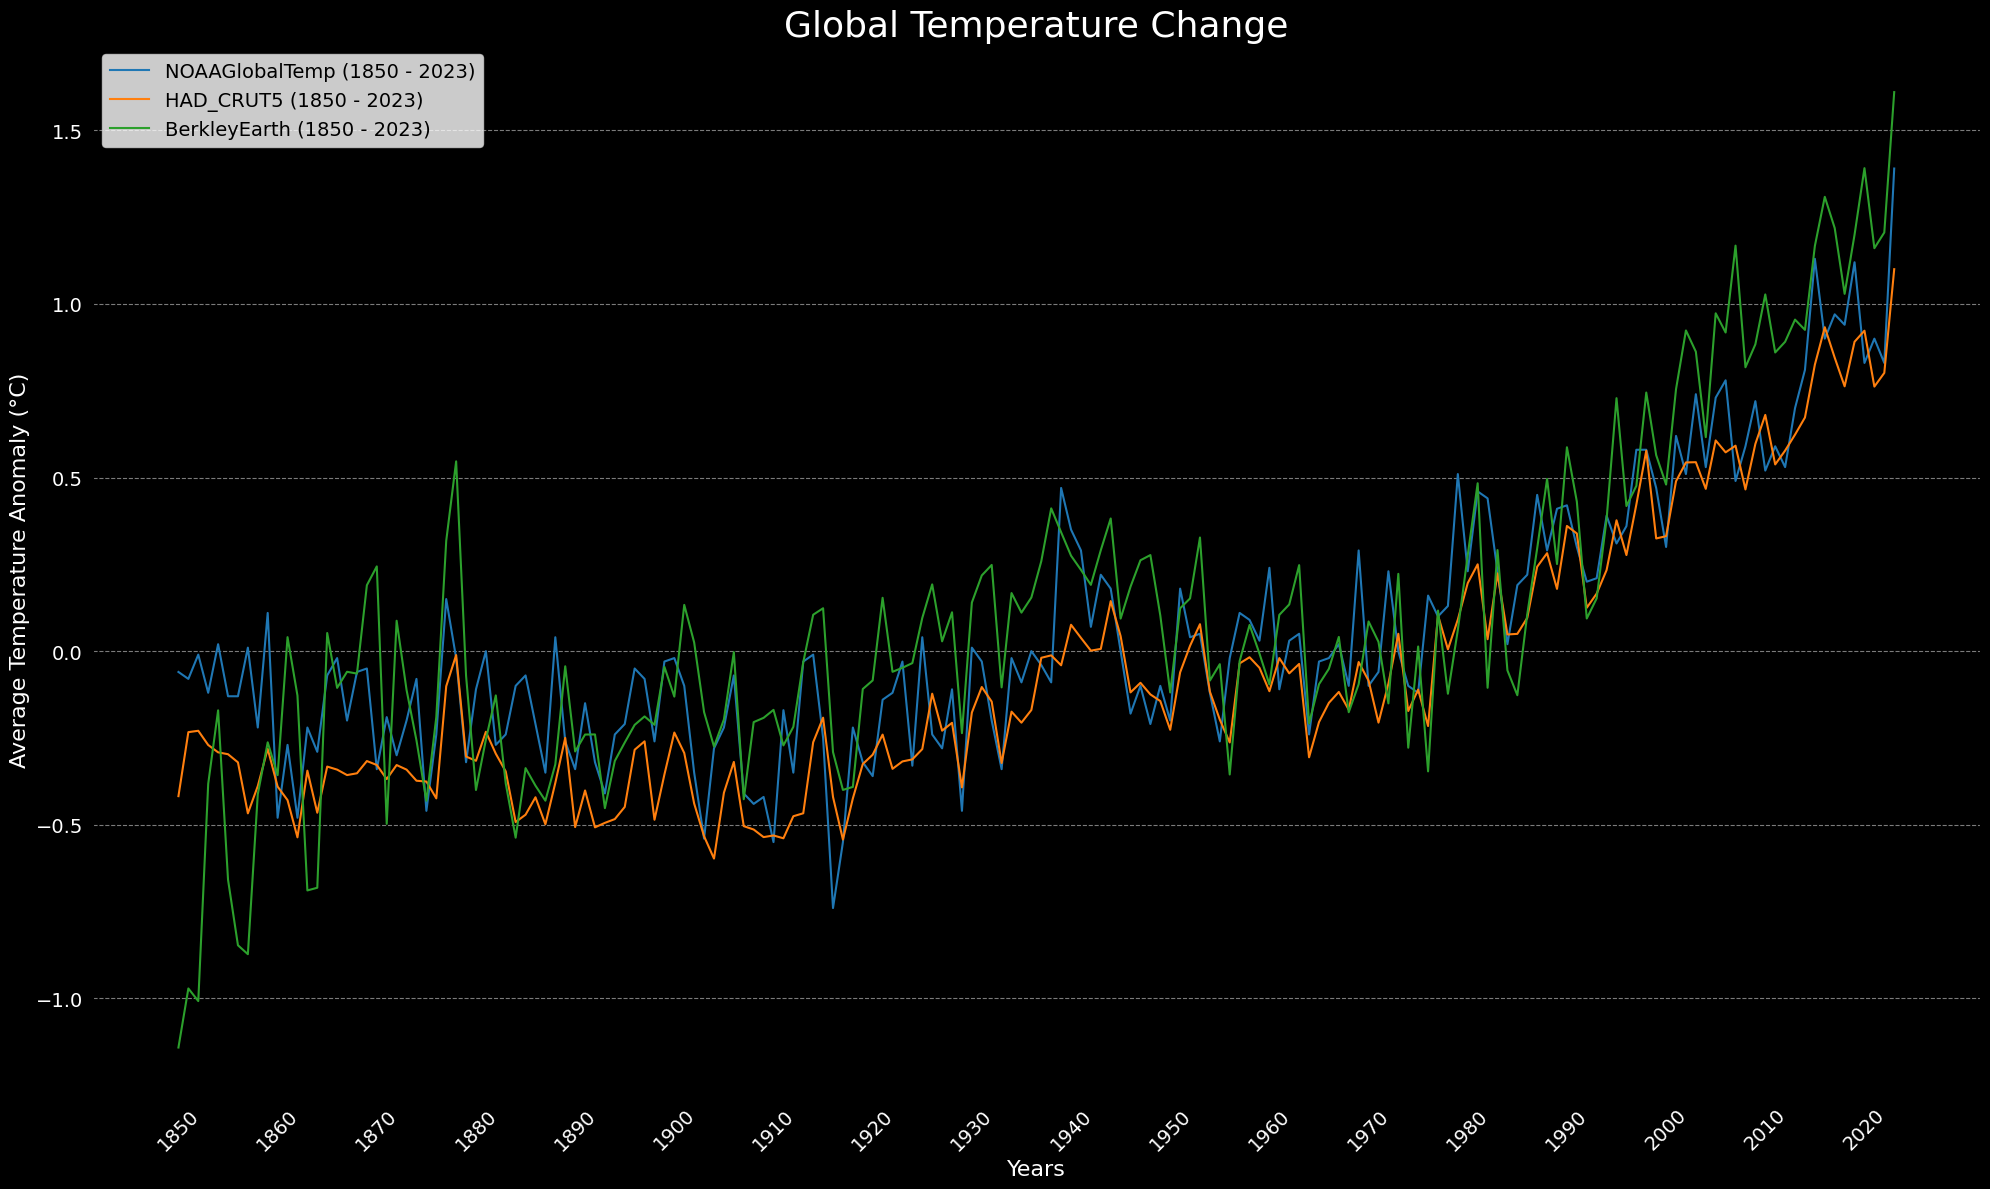

In [372]:
# Plot individual datasets
plt.figure(figsize=(20, 12), facecolor='black')
bars = plt.plot(merged_df.index, merged_df)

plt.title('Global Temperature Change', fontsize=26, color='white')
plt.xlabel('Years', fontsize=16, color='white')
plt.ylabel('Average Temperature Anomaly (°C)', fontsize=16, color='white')
plt.xticks(range(merged_df.index.min(), merged_df.index.max(), 10), rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('black')

plt.legend(merged_df.columns,fontsize= 14)
plt.tight_layout()
plt.show()

## Grouping by decade
Calculates the average temperature anomaly across the three datasets for each year, assigns it to a new column, and then computes the decade averages based on these yearly values. This allows for the visualization of temperature trends over broader time intervals (next visualization).

In [373]:
merged_df['obs_average'] = merged_df[['NOAAGlobalTemp (1850 - 2023)','HAD_CRUT5 (1850 - 2023)','BerkleyEarth (1850 - 2023)']].mean(axis=1)

# Extract the decade from the year
merged_df['Decade'] = merged_df.index // 10 * 10

# This is performing an operation on the index of the DataFrame. 
# The // operator in Python performs floor division. This means it divides the number and then rounds down to the nearest whole number. 
# So, merged_df.index // 10 is dividing the index by 10 and rounding down. This effectively extracts the decade from a year. 
# For example, if the index was the year 1995, 1995 // 10 would give 199. Multiplying by 10 gets us back to the decade, 1990 in this case.

# Calculate the decadal averages
decadal_averages = merged_df.groupby('Decade')['obs_average'].mean()

## Overall trend in decade changes of temperature anomalies

The following decade graph condenses yearly temperature anomalies into decade-long intervals, offering a bird's-eye view of temperature trends. By smoothing out yearly fluctuations, they reveal the broader patterns and shifts in temperature over time. This visualization allows us to easily discern long-term trends, such as periods of warming or cooling, and identify significant changes across decades.

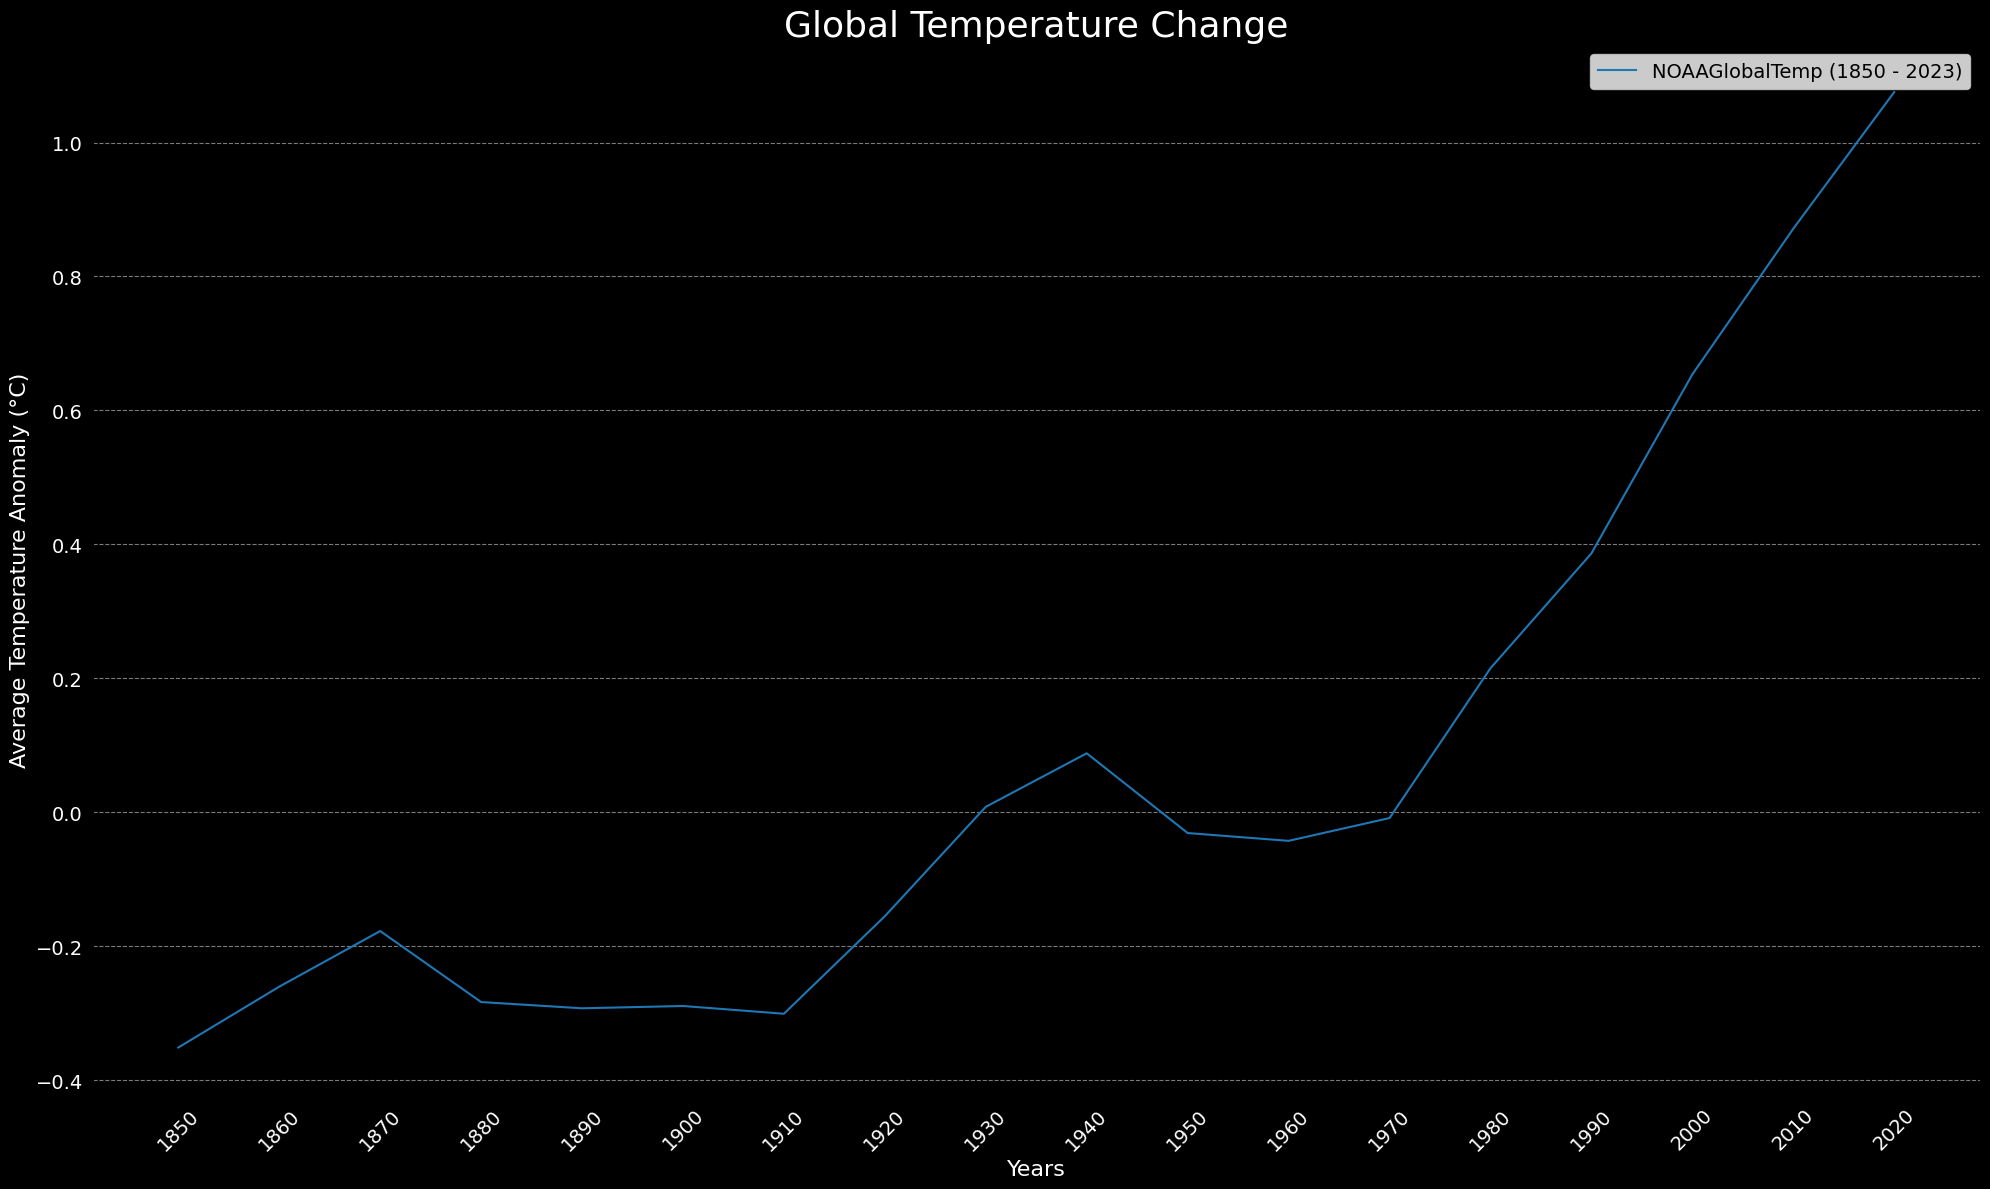

In [374]:
# Plot individual datasets
plt.figure(figsize=(20, 12), facecolor='black')
bars = plt.plot(decadal_averages.index, decadal_averages )

plt.title('Global Temperature Change', fontsize=26, color='white')
plt.xlabel('Years', fontsize=16, color='white')
plt.ylabel('Average Temperature Anomaly (°C)', fontsize=16, color='white')
plt.xticks(range(merged_df.index.min(), merged_df.index.max(), 10), rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('black')
plt.legend(merged_df.columns, fontsize=14)
plt.tight_layout()
plt.show()

## Dancing Through Annual Temperature Anomalies

We now calculate the average temperature anomalies across multiple observatories, namely NOAA, HADCRUT5, and Berkeley Earth, for each year. By averaging the anomalies from these observatories, this provides a comprehensive view of global temperature changes over time.

To enhance the visualization and aid interpretation, we employ a gradient color scheme to represent the temperature anomalies. Warmer anomalies are depicted in shades of red, while cooler anomalies are represented in shades of blue, with white indicating neutral temperatures. This color mapping helps viewers quickly discern the magnitude and direction of temperature deviations.

Plotting the temperature anomalies on a yearly basis allows us to show detailed analysis of anomaly trends over time.

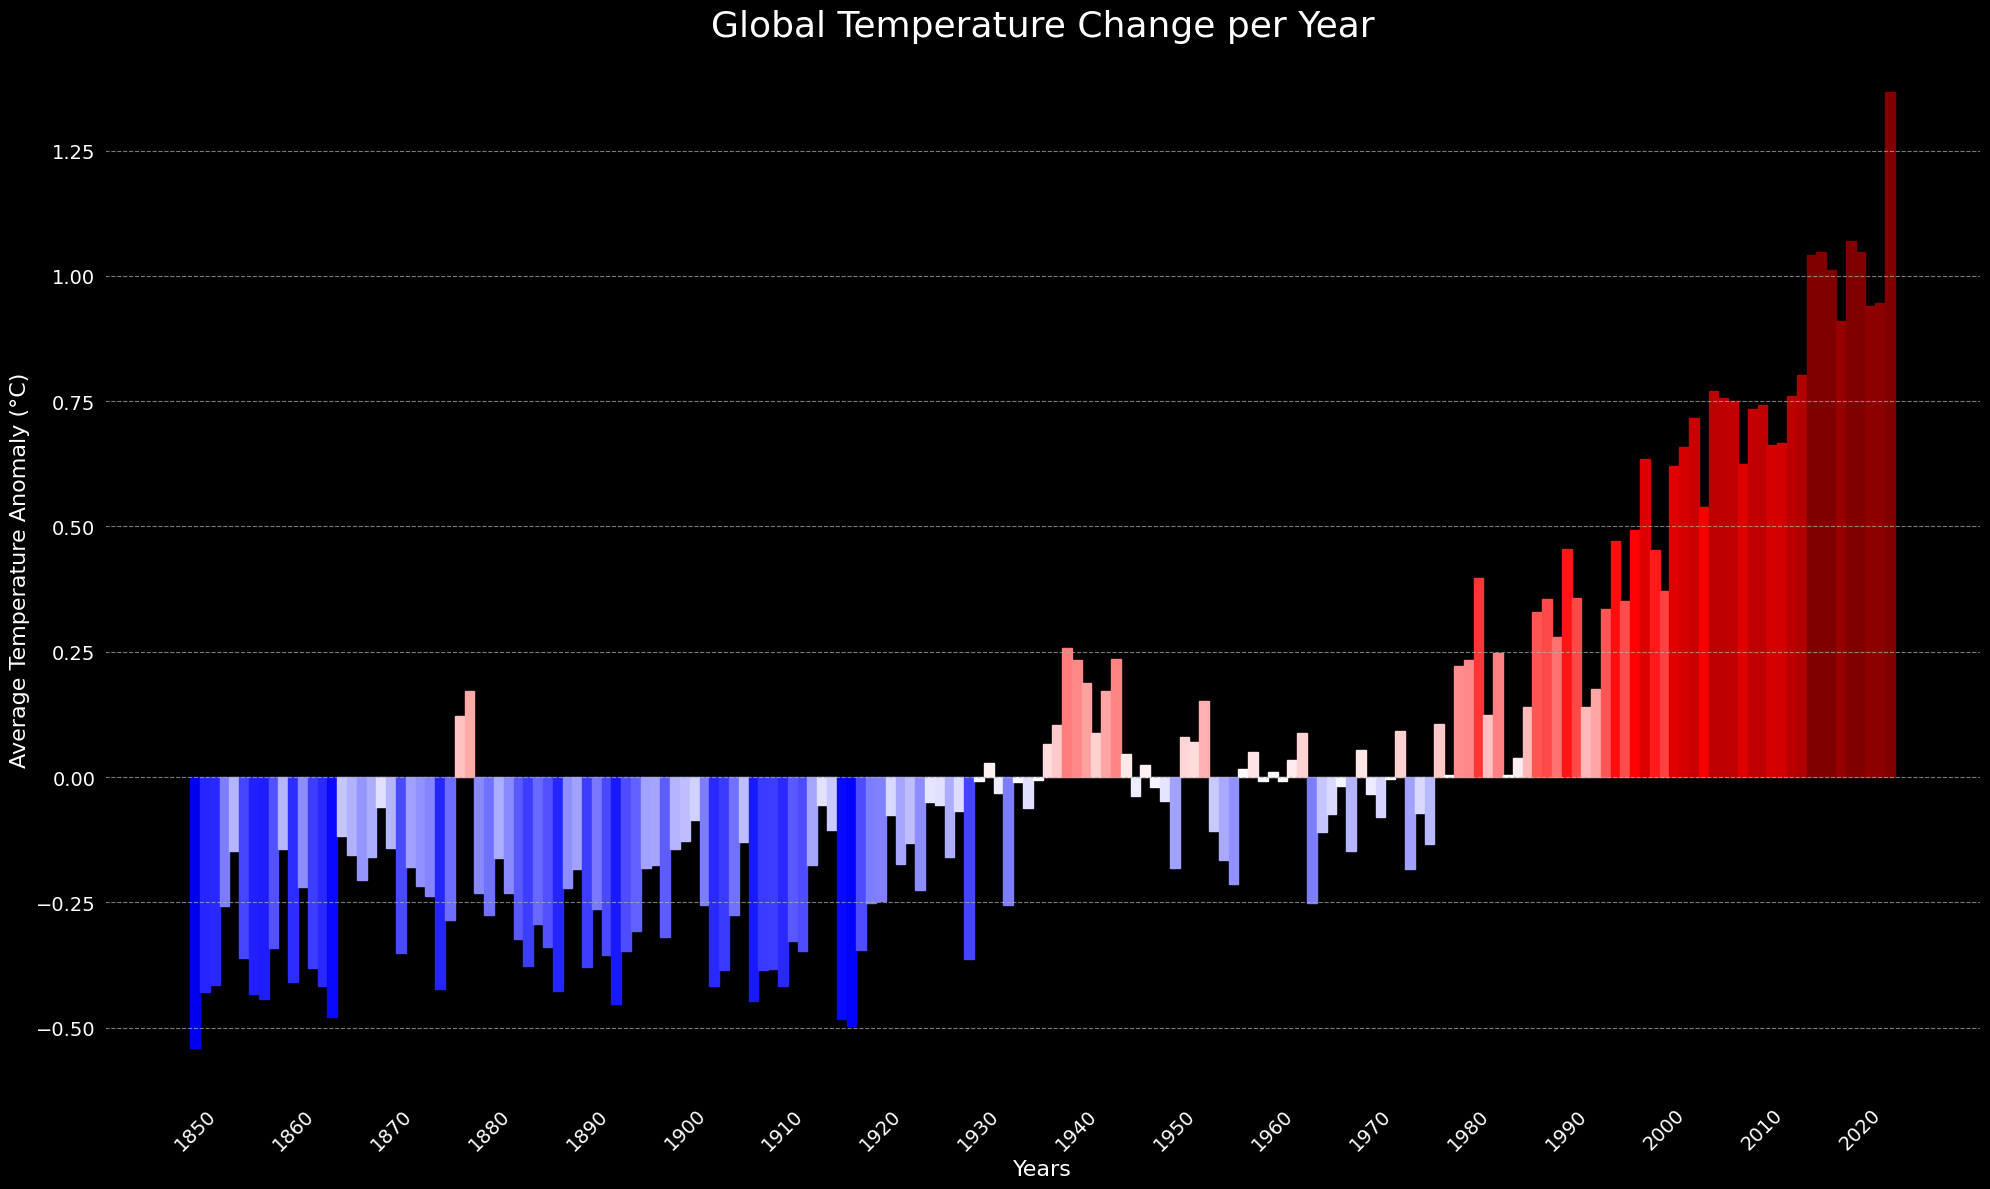

In [375]:
# Calculate the observatories averages
observatories_averages = merged_df[['NOAAGlobalTemp (1850 - 2023)','HAD_CRUT5 (1850 - 2023)','BerkleyEarth (1850 - 2023)']].mean(axis=1)

# Define the color map for the gradient
color_map = plt.cm.get_cmap('seismic')

# Plot decadal temperature anomalies with enhanced aesthetics
plt.figure(figsize=(20, 12), facecolor='black')
bars = plt.bar(merged_df.index, observatories_averages, edgecolor='gray', width=1)
# Set the color of each bar based on the y value
for bar, value in zip(bars, observatories_averages):
    color = color_map((value + 1) / 2)  # Normalize the value to range from 0 to 1
    bar.set_color(color)

plt.title('Global Temperature Change per Year', fontsize=26, color='white')
plt.xlabel('Years', fontsize=16, color='white')
plt.ylabel('Average Temperature Anomaly (°C)', fontsize=16, color='white')
plt.xticks(range(merged_df.index.min(), merged_df.index.max(), 10), rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()

## Adding Major Events

In the Resources folder a JSON file containing major climate-related events exists. The following cell adds markers to the temperature anomaly plot for the corresponding years.

The JSON file is read to extract information about significant events and their respective years.

For each event year, a vertical marker is added to the plot above the corresponding bar. If the temperature anomaly for the year is negative, the marker is placed slightly above the x-axis. Otherwise, it's positioned slightly above the bar representing the temperature anomaly.

The marker is displayed as a short vertical line with a label indicating the event name. The label is positioned above the marker and rotated for better readability.

These markers serve as visual cues, prompting further investigation or interpretation of possible causes contributing to temperature increases or anomalies in specific years.

Description of the events and associated sources :

| Invention/Event                 | Year | Impact on Temperature                              | Explanation                                                                                                                                                                                                                                                                                                                                                            | Source                                                                     |
| ------------------------------- | ---- | -------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| Discovery of Oil                | 1859 | Increased                                          | The discovery and subsequent reliance on oil as a fuel source further intensified greenhouse gas emissions.                                                                                                                                                                                                                                                            | https://www.britannica.com/science/petroleum                               |
| Internal Combustion Engine      | 1876 | Increased                                          | The invention and widespread adoption of the internal combustion engine led to the rise of automobiles and increased reliance on fossil fuels.                                                                                                                                                                                                                         | https://en.wikipedia.org/wiki/Internal_combustion_engine                   |
| Haber-Bosch Process             | 1908 | Increased                                          | This process enabled the large-scale production of synthetic fertilizers, leading to increased agricultural practices and associated land-use changes, contributing to greenhouse gas emissions.                                                                                                                                                                       | https://www.britannica.com/summary/ammonia                                 |
| Commercial Air Travel           | 1914 | Increased                                          | The rise of commercial air travel, while initially limited, began its trajectory of contributing to greenhouse gas emissions through jet fuel combustion.                                                                                                                                                                                                              | https://www.britannica.com/topic/airline                                   |
| Discovery of Freon              | 1928 | Initially: Increased, Later: Regulated and Reduced | Freon, used in refrigeration and other applications, was later discovered to contribute significantly to ozone depletion. While not directly affecting global temperatures, a depleted ozone layer allows more ultraviolet radiation to reach Earth, potentially impacting climate patterns indirectly. Freon use was subsequently regulated and reduced.              | https://www.epa.gov/ground-level-ozone-pollution/ground-level-ozone-basics |
| Nuclear Power                   | 1942 | Potentially Reduced                                | Nuclear power can be a source of low-carbon electricity generation, potentially offsetting some greenhouse gas emissions from fossil fuel-based sources. However, concerns remain regarding nuclear waste disposal and safety.                                                                                                                                         | https://www.epa.gov/radtown/nuclear-power-plants                           |
| Computer Revolution             | 1940 | Mixed                                              | The development and proliferation of computers and related technologies have both positive and negative impacts on temperature. While enabling advancements in renewable energy research and energy efficiency, they also contribute to increased energy demands for data centers and electronic devices.                                                              | https://en.wikipedia.org/wiki/Computer                                     |
| Space Race                      | 1957 | Limited but Potentially Increased                  | While the primary focus of the Space Race was scientific and technological advancement, the associated rocket launches and activities may have contributed, to a lesser extent, to greenhouse gas emissions.                                                                                                                                                           | https://en.wikipedia.org/wiki/Space_Race                                   |
| Montreal Protocol               | 1987 | Potentially Reduced                                | This international treaty aimed at phasing out the production and use of ozone-depleting substances like chlorofluorocarbons (CFCs). While not directly impacting global temperatures, it helped protect the ozone layer, potentially mitigating indirect climate effects.                                                                                             | https://www.state.gov/key-topics-office-of-environmental-quality-and-transboundary-issues/the-montreal-protocol-on-substances-that-deplete-the-ozone-layer/                                                      |
| World Wide Web                  | 1989 | Mixed                                              | Similar to the computer revolution, the internet has both positive and negative consequences. It facilitates communication and collaboration for climate research and awareness but also contributes to increased energy consumption from data centers and electronic devices.                                                                                         | https://www.w3.org/History/1989/proposal.html                                                      |
| Hydraulic Fracturing (Fracking) | 1947 | Increased                                          | This technique allows for the extraction of oil and gas from unconventional resources like shale formations. While increasing energy supply, it can also lead to methane emissions, a potent greenhouse gas, contributing to global warming.                                                                                                                           | https://www.kgs.ku.edu/Publications/PIC/pic32.html                                                      |
| Kyoto Protocol                  | 1997 | Potentially Reduced                                | This international agreement aimed to reduce greenhouse gas emissions from developed countries. While its effectiveness was limited, it marked a significant step towards international cooperation on climate change.                                                                                                                                                 | https://www.diplomatie.gouv.fr/en/french-foreign-policy/climate-and-environment/the-fight-against-climate-change/international-climate-change/article/20016                                                      |
| Lithium-ion Battery             | 1991 | Mixed                                              | These batteries are crucial for the development of electric vehicles and renewable energy storage. While promoting cleaner transportation and energy sources, the mining and production of lithium can have environmental impacts.                                                                                                                                     | https://en.wikipedia.org/wiki/Lithium-ion_battery#:~:text=M.,problems%20and%20was%20never%20commercialized.                                                      |
| Paris Agreement                 | 2015 | Potentially Reduced                                | This international agreement aims to limit global warming to well below 2 degrees Celsius, ideally 1.5 degrees Celsius, compared to pre-industrial levels. While its success hinges on ambitious national commitments and implementation, it provides a framework for collective action against climate change.                                                        | https://unfccc.int/process-and-meetings/the-paris-agreement                                                     |                                                     |
| COVID-19                        | 2020 | Temporary Decrease                                 | Due to global lockdowns and reduced economic activity during the pandemic, global greenhouse gas emissions temporarily decreased. However, this is not considered a sustainable solution to climate change, and emissions are expected to rebound as economic activity resumes.                                                                                        | https://www.who.int/health-topics/coronavirus#tab                                                      |

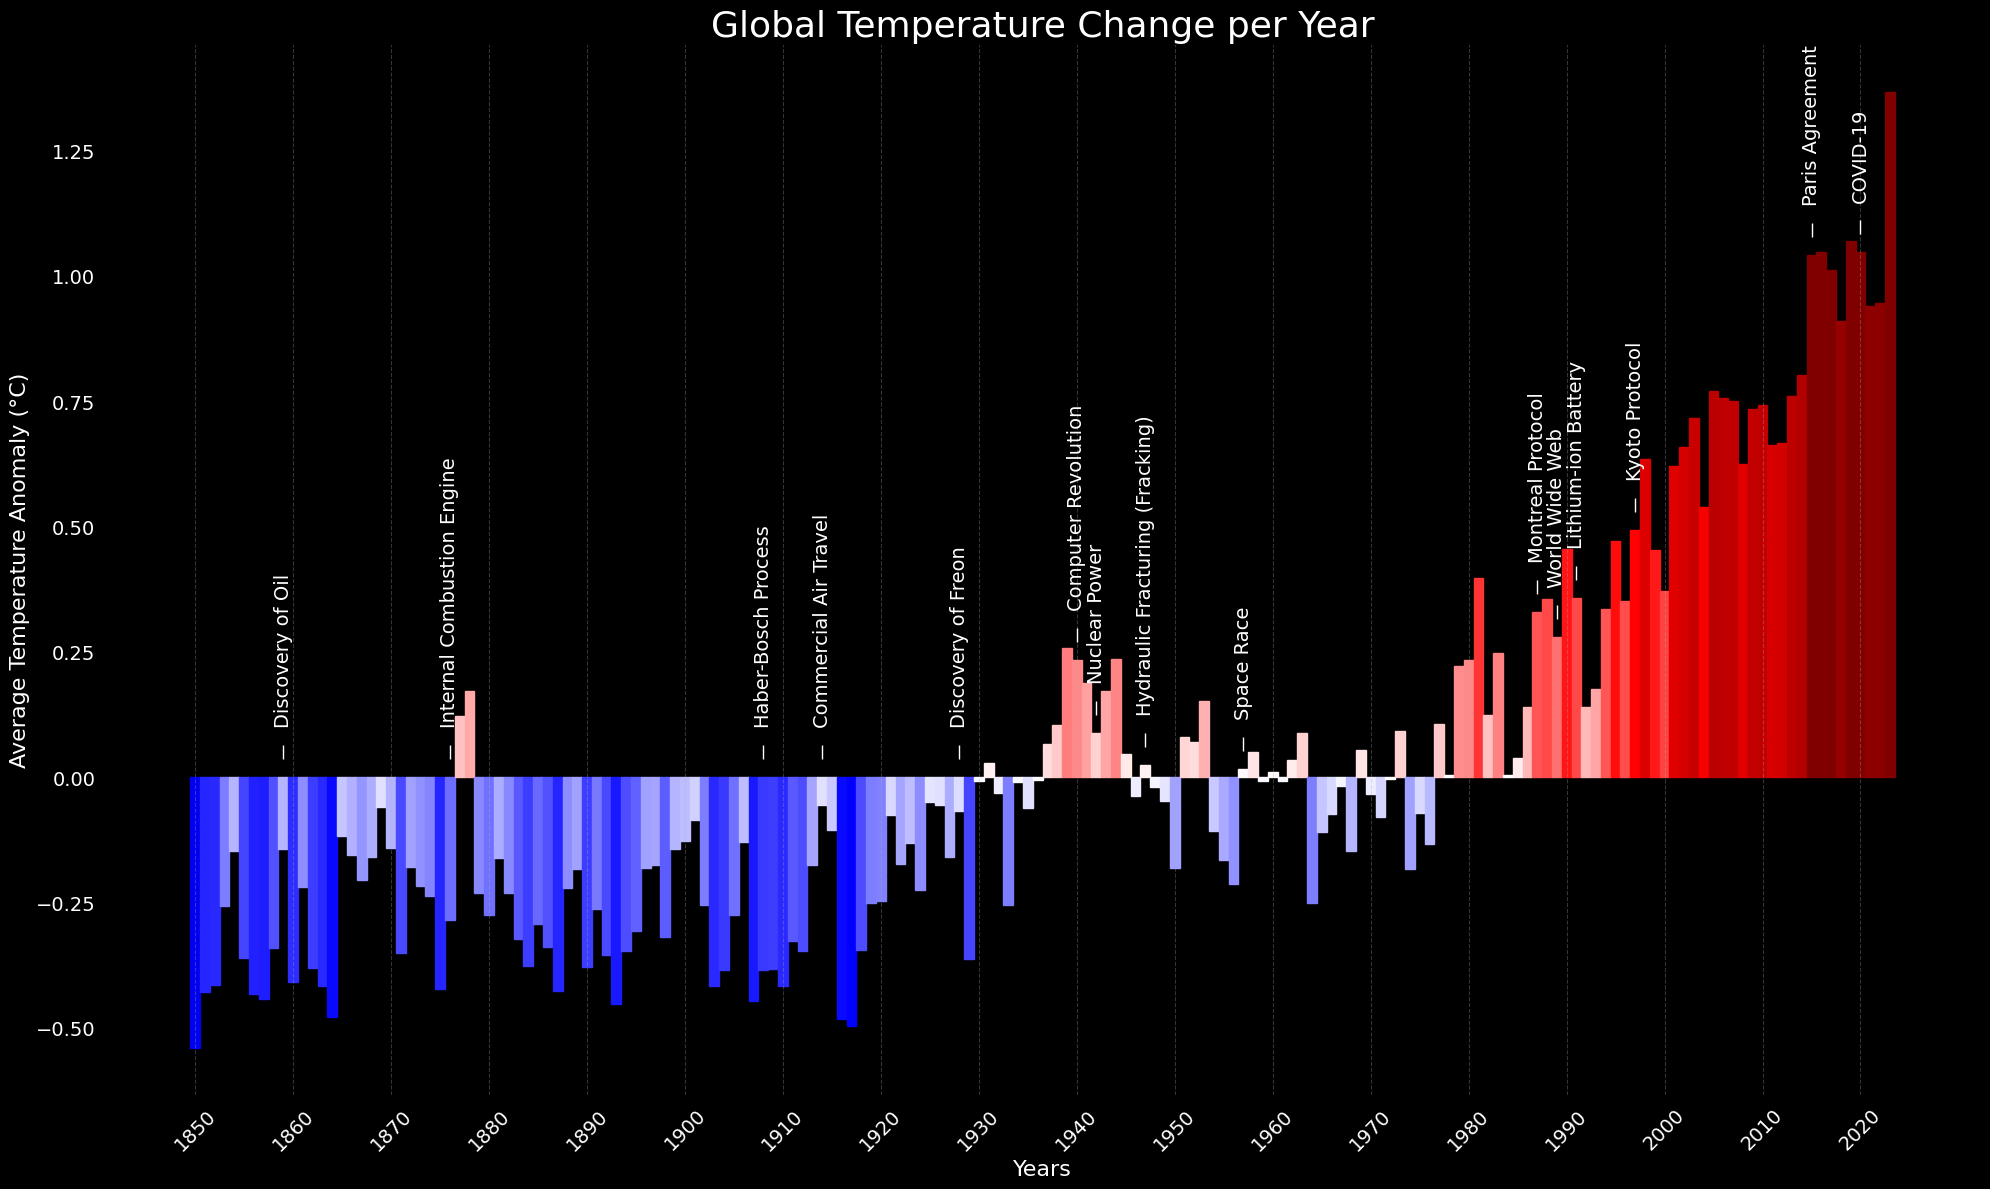

In [376]:
# Load the data from the JSON file
with open('Resources/major_events.json', 'r') as file:
    climate_data = json.load(file)

plt.figure(figsize=(20, 12), facecolor='black')
bars = plt.bar(merged_df.index, observatories_averages, edgecolor='gray', width=1)

# Set the color of each bar based on the y value
for bar, value in zip(bars, observatories_averages):
    color = color_map((value + 1) / 2)  # Normalize the value to range from 0 to 1
    bar.set_color(color)

# Add vertical lines for events
for event in climate_data:
    year = event["Year"]
    event_name = event["Invention/Event"]
    if year in merged_df.index:
        # Get the height of the corresponding bar if it is negative 
        if observatories_averages[year] < 0:
            bar_height = 0.05
        else:
            bar_height = observatories_averages[year] + 0.05
        # Plot the marker above the bar
        plt.plot(year, bar_height, marker='|', color='white', markersize=10)  # Add short vertical line
        plt.text(year, bar_height + 0.05, event_name, color='white', rotation=90, ha='center', va='bottom', fontsize=14)

plt.title('Global Temperature Change per Year', fontsize=26, color='white')
plt.xlabel('Years', fontsize=16, color='white')
plt.ylabel('Average Temperature Anomaly (°C)', fontsize=16, color='white')
plt.xticks(range(merged_df.index.min(), merged_df.index.max(), 10), rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.gca().set_facecolor('black')

plt.tight_layout()
plt.show()


## Conclusion
To wrap up, our contribution on temperature change analysis highlights the urgency of the climate crisis. While scientists provide valuable insights, we must also realize that they're not infallible. By embracing uncertainty and using our imagination grounded in what we know, we can start building a better future. It's crucial to engage in conversations about climate change and take meaningful action. Let's commit to addressing this challenge together, using the data we have to guide us towards a more sustainable world.